#### ECON1612 - Assessment 3: Empirical Project in Python (Individual) - Vietnam
### STUDENT ID: 4000175
### STUDENT NAME: TRAN HUONG LY
### CLASS GROUP: SGS01

In [562]:
# Module imports
# import modules for use below
# (Note: Modules specific to particular machine learning examples are imported in the relevant code block)
# 'as' allows use of an abbreviated module name
import matplotlib.pyplot as plt     # Matplotlib for low-level plot details
import numpy as np                  # NumPy for fast numeric operations
import pandas as pd                 # Pandas for datasets
import seaborn as sns               # Seaborn for easier plotting

In [563]:
# set a random number generator seed to allow reproducibility
# REQUIRE FOR ASSIGNMENT 3: Use your student ID (only number) to set this seed parameter.
seed = 4000175
# The 'random_state' parameter of train_test_split must be an int in the range [0, 4294967295]

In [564]:
# Read the data into a pandas dataframe for futher analysis
df = pd.read_csv('bank-additional-full-1.csv', sep=';')

In [566]:
# View the first few rows to check all looks normal
df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


## Data Cleaning
Often the data provided is not in the final form we want to work with. Data cleaning refers to the process whereby we transform the initial data into the final form we want/need to work with.
The following steps do not form part of the assessment, but are a demonstration of some of the steps which may be involved in data cleaning.
In the following example this process includes:
- Removing unneeded data
- Transforming data - in this case, transforming categorical data into binary data (one hot encoding) 

**Notes:**

_-When working with Pandas axis=0 means a row operation and axis=1 means a column operation._

_-The a subset of columns can be selected by creating a list of names e.g. ['var1', 'var2']._

### Remove unneeded data
Unneeded data unnecessarily complicates the machine learning pipeline. Here we drop entire columns which are unneeded

In [572]:
# Note - `inplace=True` affects the current dataframe directly
#  - otherwise we would need to assign the returned dataframe to a new variable
df.drop(['contact', 'month', 'day_of_week', 'duration', 'campaign'], axis=1, inplace=True)

### Encode data
Data encoding, or transformation, involves changing the form of the data

**Note:**

_sklearn has it's own perprocessing classes (e.g. LabelBinarizer, OneHotEncoder) which can be used as part of a data processing pipeline to do this. For the sake of those unfamiliar with data processing in Python we have used simpler pandas methods here._

#### Binary Variables

In [574]:
# `y` is currently a text column - encode all 'yes' values as `1`, everything else as `0` 
# and store in a column named 'y_encoded' (this will be our final target array)
df['y_encoded'] = df['y'].apply(lambda row: 1 if row == 'yes' else 0)
df.head(n=20)

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_encoded
0,56,housemaid,married,basic.4y,no,no,no,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0
1,57,services,married,high.school,unknown,no,no,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0
2,37,services,married,high.school,no,yes,no,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0
3,40,admin.,married,basic.6y,no,no,no,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0
4,56,services,married,high.school,no,no,yes,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0
5,45,services,married,basic.9y,unknown,no,no,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0
6,59,admin.,married,professional.course,no,no,no,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0
7,41,blue-collar,married,unknown,unknown,no,no,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0
8,24,technician,single,professional.course,no,yes,no,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0
9,25,services,single,high.school,no,yes,no,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0


In [576]:
# Now repeat for other columns using this encoding
# creating dummy for default or not
df['is_default'] = df['default'].apply(lambda row: 1 if row == 'yes' else 0)
df['is_housing'] = df['housing'].apply(lambda row: 1 if row == 'yes' else 0)
df['is_loan'] = df['loan'].apply(lambda row: 1 if row == 'yes' else 0)

In [577]:
# create a binary indicator for whether person was contacted or not in marketing campaign 
# (pdays = 999 if they weren't contacted at all)
df['treated'] = df['pdays'].apply(lambda row: 0 if row == 999 else 1)
df[['treated', 'pdays']].head()

,treated,pdays
0,0,999
1,0,999
2,0,999
3,0,999
4,0,999


#### Nominal data
Nominal data is data with generally several categories, and for which there is no 'innate' ordering of the categories. This kind of data is generally encoded by creating a number of 'dummy' columns containing binary (yes/no) data - one column for each 'category' in the original data

In [581]:
# the 'marital' column is nominal data - there are several different categories, for which ordering doesn't make sense
# we will use the pandas 'get_dummies' method to create a different binary column for each status
# NOTE: This will create several columns named 'marital_...' for each category
marital_dummies = pd.get_dummies(df['marital'], prefix = 'marital')

# view the 'new' and original columns
pd.concat([df['marital'], marital_dummies], axis=1).head()

,marital,marital_divorced,marital_married,marital_single,marital_unknown
0,married,False,True,False,False
1,married,False,True,False,False
2,married,False,True,False,False
3,married,False,True,False,False
4,married,False,True,False,False


In [583]:
# now drop the new 'marital_unknown' variable
marital_dummies.drop('marital_unknown', axis=1, inplace=True)
# merge new dummies into main dataframe
df = pd.concat([df, marital_dummies], axis=1)
df.head()

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_encoded,is_default,is_housing,is_loan,treated,marital_divorced,marital_married,marital_single
0,56,housemaid,married,basic.4y,no,no,no,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0,0,0,False,True,False
1,57,services,married,high.school,unknown,no,no,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0,0,0,False,True,False
2,37,services,married,high.school,no,yes,no,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0,0,1,0,0,False,True,False
3,40,admin.,married,basic.6y,no,no,no,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0,0,0,False,True,False
4,56,services,married,high.school,no,no,yes,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0,1,0,False,True,False


In [584]:
# repeat for 'job'
job_dummies = pd.get_dummies(df['job'], prefix = 'job')
job_dummies.drop('job_unknown', axis=1, inplace=True)
X = pd.concat([df, job_dummies], axis=1)

# and 'poutcome'
poutcome_dummies = pd.get_dummies(df['poutcome'], prefix = 'poutcome')
df = pd.concat([df, poutcome_dummies], axis=1)
df.head()

# and 'education'
# Note: Education is a Ordinal value (the categories have an innate order,
# and would usually be encoded using an OrdinalEncoder 
# - for simplicity here we are again using simple binary dummy values)
education_dummies = pd.get_dummies(df['education'], prefix = 'education')
education_dummies.drop('education_unknown', axis=1, inplace=True)
df = pd.concat([df, education_dummies], axis=1)
df.head()

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_encoded,is_default,is_housing,is_loan,treated,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_nonexistent,poutcome_success,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,56,housemaid,married,basic.4y,no,no,no,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0,0,0,False,True,False,False,True,False,True,False,False,False,False,False,False
1,57,services,married,high.school,unknown,no,no,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0,0,0,False,True,False,False,True,False,False,False,False,True,False,False,False
2,37,services,married,high.school,no,yes,no,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0,0,1,0,0,False,True,False,False,True,False,False,False,False,True,False,False,False
3,40,admin.,married,basic.6y,no,no,no,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0,0,0,False,True,False,False,True,False,False,True,False,False,False,False,False
4,56,services,married,high.school,no,no,yes,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0,1,0,False,True,False,False,True,False,False,False,False,True,False,False,False


### Split out our X and Y data
We split the dataset into a target array (here the column currently called `y_encoded`) and a features matrix (all other columns). By convention these are named `X` and `y`

In [588]:
# NOTE: we use `copy` to ensure that `X` and `y` are not simply views into the existing datagrame
y = df['y_encoded'].copy()
X = df.copy()
X.drop(['y_encoded', 'y'], axis=1, inplace=True)

In [590]:
#drop  the 'original' variables (now encoded as other columns)
X.drop(['job', 'education', 'marital', 'default', 'housing', 'loan', 'pdays', 'poutcome',], axis=1, inplace=True)

In [592]:
# Review the final dataframe
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   previous                       41188 non-null  int64  
 2   emp.var.rate                   41188 non-null  float64
 3   cons.price.idx                 41188 non-null  float64
 4   cons.conf.idx                  41188 non-null  float64
 5   euribor3m                      41188 non-null  float64
 6   nr.employed                    41188 non-null  float64
 7   is_default                     41188 non-null  int64  
 8   is_housing                     41188 non-null  int64  
 9   is_loan                        41188 non-null  int64  
 10  treated                        41188 non-null  int64  
 11  marital_divorced               41188 non-null  bool   
 12  marital_married                41188 non-null 

In [594]:
# Review the final target
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 41188 entries, 0 to 41187
Series name: y_encoded
Non-Null Count  Dtype
--------------  -----
41188 non-null  int64
dtypes: int64(1)
memory usage: 321.9 KB


## Assignment Questions
### 1) Summarise and describe the data
#### a) Print the first 20 rows of data

In [598]:
pd.options.display.max_columns = None
first_rows = X.head(n=20)
first_rows


,age,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,is_default,is_housing,is_loan,treated,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_nonexistent,poutcome_success,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,56,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0,False,True,False,False,True,False,True,False,False,False,False,False,False
1,57,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0,False,True,False,False,True,False,False,False,False,True,False,False,False
2,37,0,1.10,93.99,-36.40,4.86,5191.00,0,1,0,0,False,True,False,False,True,False,False,False,False,True,False,False,False
3,40,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0,False,True,False,False,True,False,False,True,False,False,False,False,False
4,56,0,1.10,93.99,-36.40,4.86,5191.00,0,0,1,0,False,True,False,False,True,False,False,False,False,True,False,False,False
5,45,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0,False,True,False,False,True,False,False,False,True,False,False,False,False
6,59,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0,False,True,False,False,True,False,False,False,False,False,False,True,False
7,41,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0,False,True,False,False,True,False,False,False,False,False,False,False,False
8,24,0,1.10,93.99,-36.40,4.86,5191.00,0,1,0,0,False,False,True,False,True,False,False,False,False,False,False,True,False
9,25,0,1.10,93.99,-36.40,4.86,5191.00,0,1,0,0,False,False,True,False,True,False,False,False,False,True,False,False,False


#### b) Describe the data e.g. mean, median, standard deviation of all the variables

In [600]:
pd.options.display.float_format = '{:.2f}'.format
X.describe()

,age,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,is_default,is_housing,is_loan,treated
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,0.17,0.08,93.58,-40.50,3.62,5167.04,0.00,0.52,0.15,0.04
std,10.42,0.49,1.57,0.58,4.63,1.73,72.25,0.01,0.50,0.36,0.19
min,17.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.00,0.00,0.00,0.00
25%,32.00,0.00,-1.80,93.08,-42.70,1.34,5099.10,0.00,0.00,0.00,0.00
50%,38.00,0.00,1.10,93.75,-41.80,4.86,5191.00,0.00,1.00,0.00,0.00
75%,47.00,0.00,1.40,93.99,-36.40,4.96,5228.10,0.00,1.00,0.00,0.00
max,98.00,7.00,1.40,94.77,-26.90,5.04,5228.10,1.00,1.00,1.00,1.00


#### c) Count the number of observations in each response category 

In [604]:
# Count the number of observations in each response category
# NOTE: This is easiest done on the data before encoding
# e.g. marital
pd.options.display.max_rows = None
categories = X.columns.values

print('Count of unique values:', 'marital')
print(df['marital'].value_counts())

Count of unique values: marital
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


In [605]:
print('Count of unique values:', 'education')
print(df['education'].value_counts())

Count of unique values: education
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64


In [607]:
print('Count of unique values:', 'poutcome')
print(df['poutcome'].value_counts())

Count of unique values: poutcome
poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64


### 2) Graphing
#### a) Basic scatter plot of two features against each other 

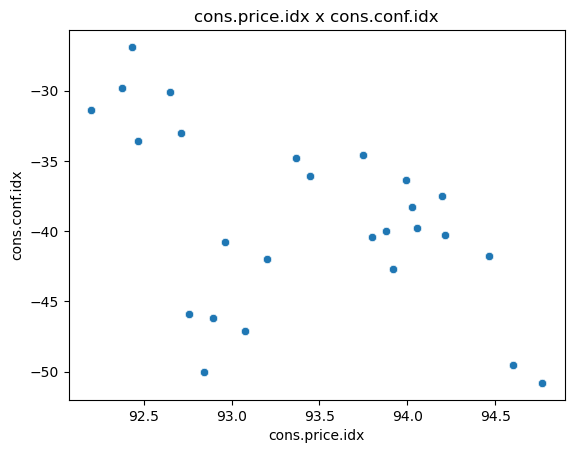

In [611]:
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=X, x="cons.price.idx", y="cons.conf.idx")\
       .set(title="cons.price.idx x cons.conf.idx", xlabel="cons.price.idx", ylabel="cons.conf.idx")
plt.show()

#### b) Histogram

In [942]:
z = df['is_loan'].copy()

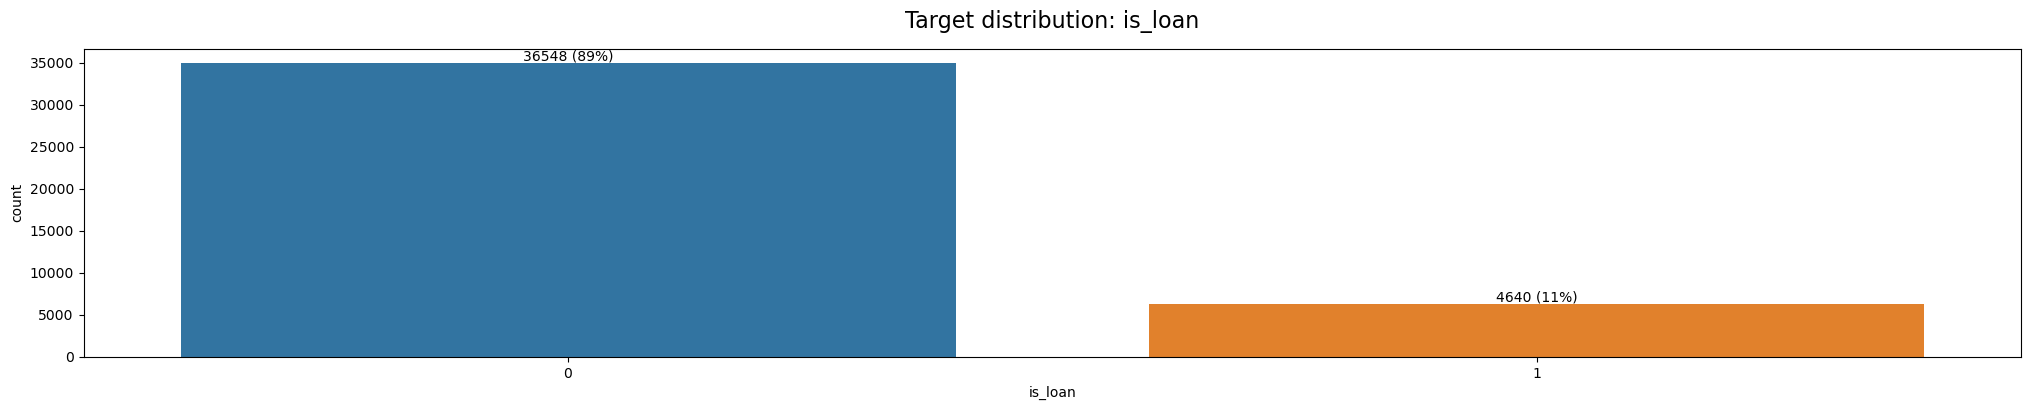

In [946]:
fig, ax = plt.subplots(figsize=(25, 4))
sns.countplot(x=z, ax=ax)

abs_vals = y.value_counts()
rel_vals = y.value_counts(normalize=True) * 100
labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_vals, rel_vals)]

ax.bar_label(container=ax.containers[0], labels=labels)
ax.set_title('Target distribution: is_loan', fontsize=16, pad=15)

plt.show()

### 3) From the 20 inputs, choose the set of controls you will use for your machine learning models. Justify why you have excluded some variables. Hint: the ones highlighted in yellow are those you may want to exclude: why? (1 mark) 

**Note:**

_Because we are doing this after the data cleaning step, there are now more than 20 inputs - so remember to take account variables which may now have been one-hot encoded into multiple dummy variables_

In [618]:
X.head(5)

,age,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,is_default,is_housing,is_loan,treated,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_nonexistent,poutcome_success,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,56,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0,False,True,False,False,True,False,True,False,False,False,False,False,False
1,57,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0,False,True,False,False,True,False,False,False,False,True,False,False,False
2,37,0,1.10,93.99,-36.40,4.86,5191.00,0,1,0,0,False,True,False,False,True,False,False,False,False,True,False,False,False
3,40,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0,False,True,False,False,True,False,False,True,False,False,False,False,False
4,56,0,1.10,93.99,-36.40,4.86,5191.00,0,0,1,0,False,True,False,False,True,False,False,False,False,True,False,False,False


In [619]:
# uncomment below and choose which columns to exclude
excluded_columns = []
excluded_columns = ['previous','poutcome_failure','education_basic.4y', 
                    'education_basic.6y', 'education_basic.9y',
                    'education_illiterate']

X_final = X.drop(excluded_columns, axis=1)
X_final.head(20)


,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,is_default,is_housing,is_loan,treated,marital_divorced,marital_married,marital_single,poutcome_nonexistent,poutcome_success,education_high.school,education_professional.course,education_university.degree
0,56,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0,False,True,False,True,False,False,False,False
1,57,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0,False,True,False,True,False,True,False,False
2,37,1.10,93.99,-36.40,4.86,5191.00,0,1,0,0,False,True,False,True,False,True,False,False
3,40,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0,False,True,False,True,False,False,False,False
4,56,1.10,93.99,-36.40,4.86,5191.00,0,0,1,0,False,True,False,True,False,True,False,False
5,45,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0,False,True,False,True,False,False,False,False
6,59,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0,False,True,False,True,False,False,True,False
7,41,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0,False,True,False,True,False,False,False,False
8,24,1.10,93.99,-36.40,4.86,5191.00,0,1,0,0,False,False,True,True,False,False,True,False
9,25,1.10,93.99,-36.40,4.86,5191.00,0,1,0,0,False,False,True,True,False,True,False,False


In [620]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
X.head(20)

,age,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,is_default,is_housing,is_loan,treated,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_nonexistent,poutcome_success,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,56,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0,False,True,False,False,True,False,True,False,False,False,False,False,False
1,57,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0,False,True,False,False,True,False,False,False,False,True,False,False,False
2,37,0,1.10,93.99,-36.40,4.86,5191.00,0,1,0,0,False,True,False,False,True,False,False,False,False,True,False,False,False
3,40,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0,False,True,False,False,True,False,False,True,False,False,False,False,False
4,56,0,1.10,93.99,-36.40,4.86,5191.00,0,0,1,0,False,True,False,False,True,False,False,False,False,True,False,False,False
5,45,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0,False,True,False,False,True,False,False,False,True,False,False,False,False
6,59,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0,False,True,False,False,True,False,False,False,False,False,False,True,False
7,41,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0,False,True,False,False,True,False,False,False,False,False,False,False,False
8,24,0,1.10,93.99,-36.40,4.86,5191.00,0,1,0,0,False,False,True,False,True,False,False,False,False,False,False,True,False
9,25,0,1.10,93.99,-36.40,4.86,5191.00,0,1,0,0,False,False,True,False,True,False,False,False,False,True,False,False,False


### 4) Build a classification tree in Python
#### a) split sample into train and test  

In [623]:
# Training and Test Data
from sklearn.model_selection import train_test_split

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Setting random_state means the split will always be the same which sometimes is useful.
X_train, X_test, y_train, y_test =\
    train_test_split(X_final, y, test_size=0.3, random_state=seed)

# Output the dimensions of each of the sets
print(f"X_train is {X_train.shape}")
print(f"X_test is {X_test.shape}")
print(f"y_train is {y_train.shape}")
print(f"y_test is {y_test.shape}")

#why keep getting error "inconsistent number of samples"

X_train is (28831, 18)
X_test is (12357, 18)
y_train is (28831,)
y_test is (12357,)


#### b) Without doing any pruning of the tree

In [852]:
from sklearn.tree import DecisionTreeClassifier


# Setup a Decision Tree 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dt_model = DecisionTreeClassifier(criterion="gini",
                                  max_depth=5, 
                                  min_samples_split=2, 
                                  random_state=seed)
dt_model.fit(X_train, y_train)
y_predict = dt_model.predict(X_test)

#### c) Draw the tree

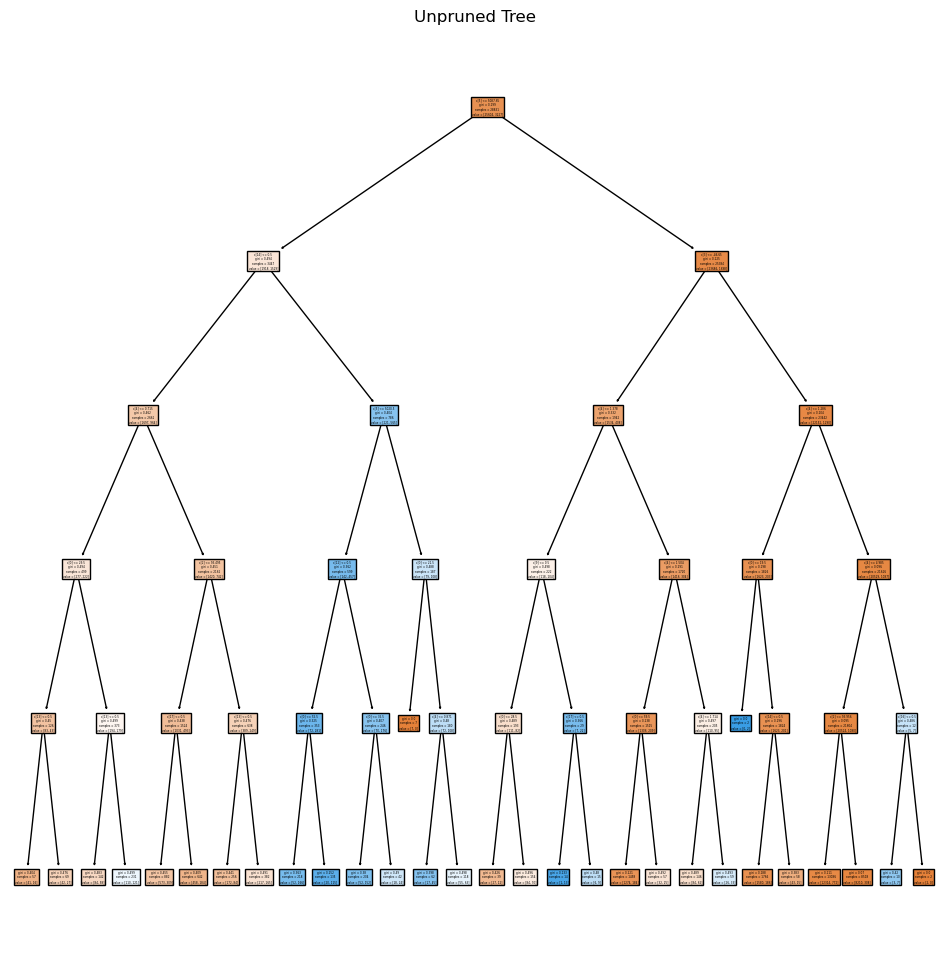

In [854]:
from sklearn.tree import plot_tree
# Plot Decision Tree using the lower-level plotting functions
# NOTE: This may take some time to complete
plt.figure(figsize=(12,12))
plot_tree(dt_model, filled=True)
plt.title("Unpruned Tree")
plt.savefig("unpruned.png")

### 6) Calculate feature importance for each feature

In [969]:
# Print 4dp of each feature importance 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.feature_importances_
# See the following for an explanation, but note this a regression example so uses MSE rather than GINI
# https://towardsdatascience.com/feature-importance-in-decision-trees-e9450120b445
for i in range(len(dt_model.feature_names_in_)):
      if f"{gs.best_estimator_.feature_importances_[i]:.4f}" != "0.0000":
        print(f"{dt_model.feature_names_in_[i]}: {dt_model.feature_importances_[i]:.4f}")


age: 0.0213
cons.price.idx: 0.0074
cons.conf.idx: 0.0677
euribor3m: 0.0815
nr.employed: 0.6833
is_housing: 0.0000
treated: 0.0044
poutcome_nonexistent: 0.0050
poutcome_success: 0.1231


### 7) Do GridsearchCV to find the optimal tree and draw the tree

In [972]:
print('max_depth: ', np.linspace(1, 50, 50, dtype='int16')),
print('min_samples_split: ', np.linspace(0.1, 1.0, 10))

max_depth:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
min_samples_split:  [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


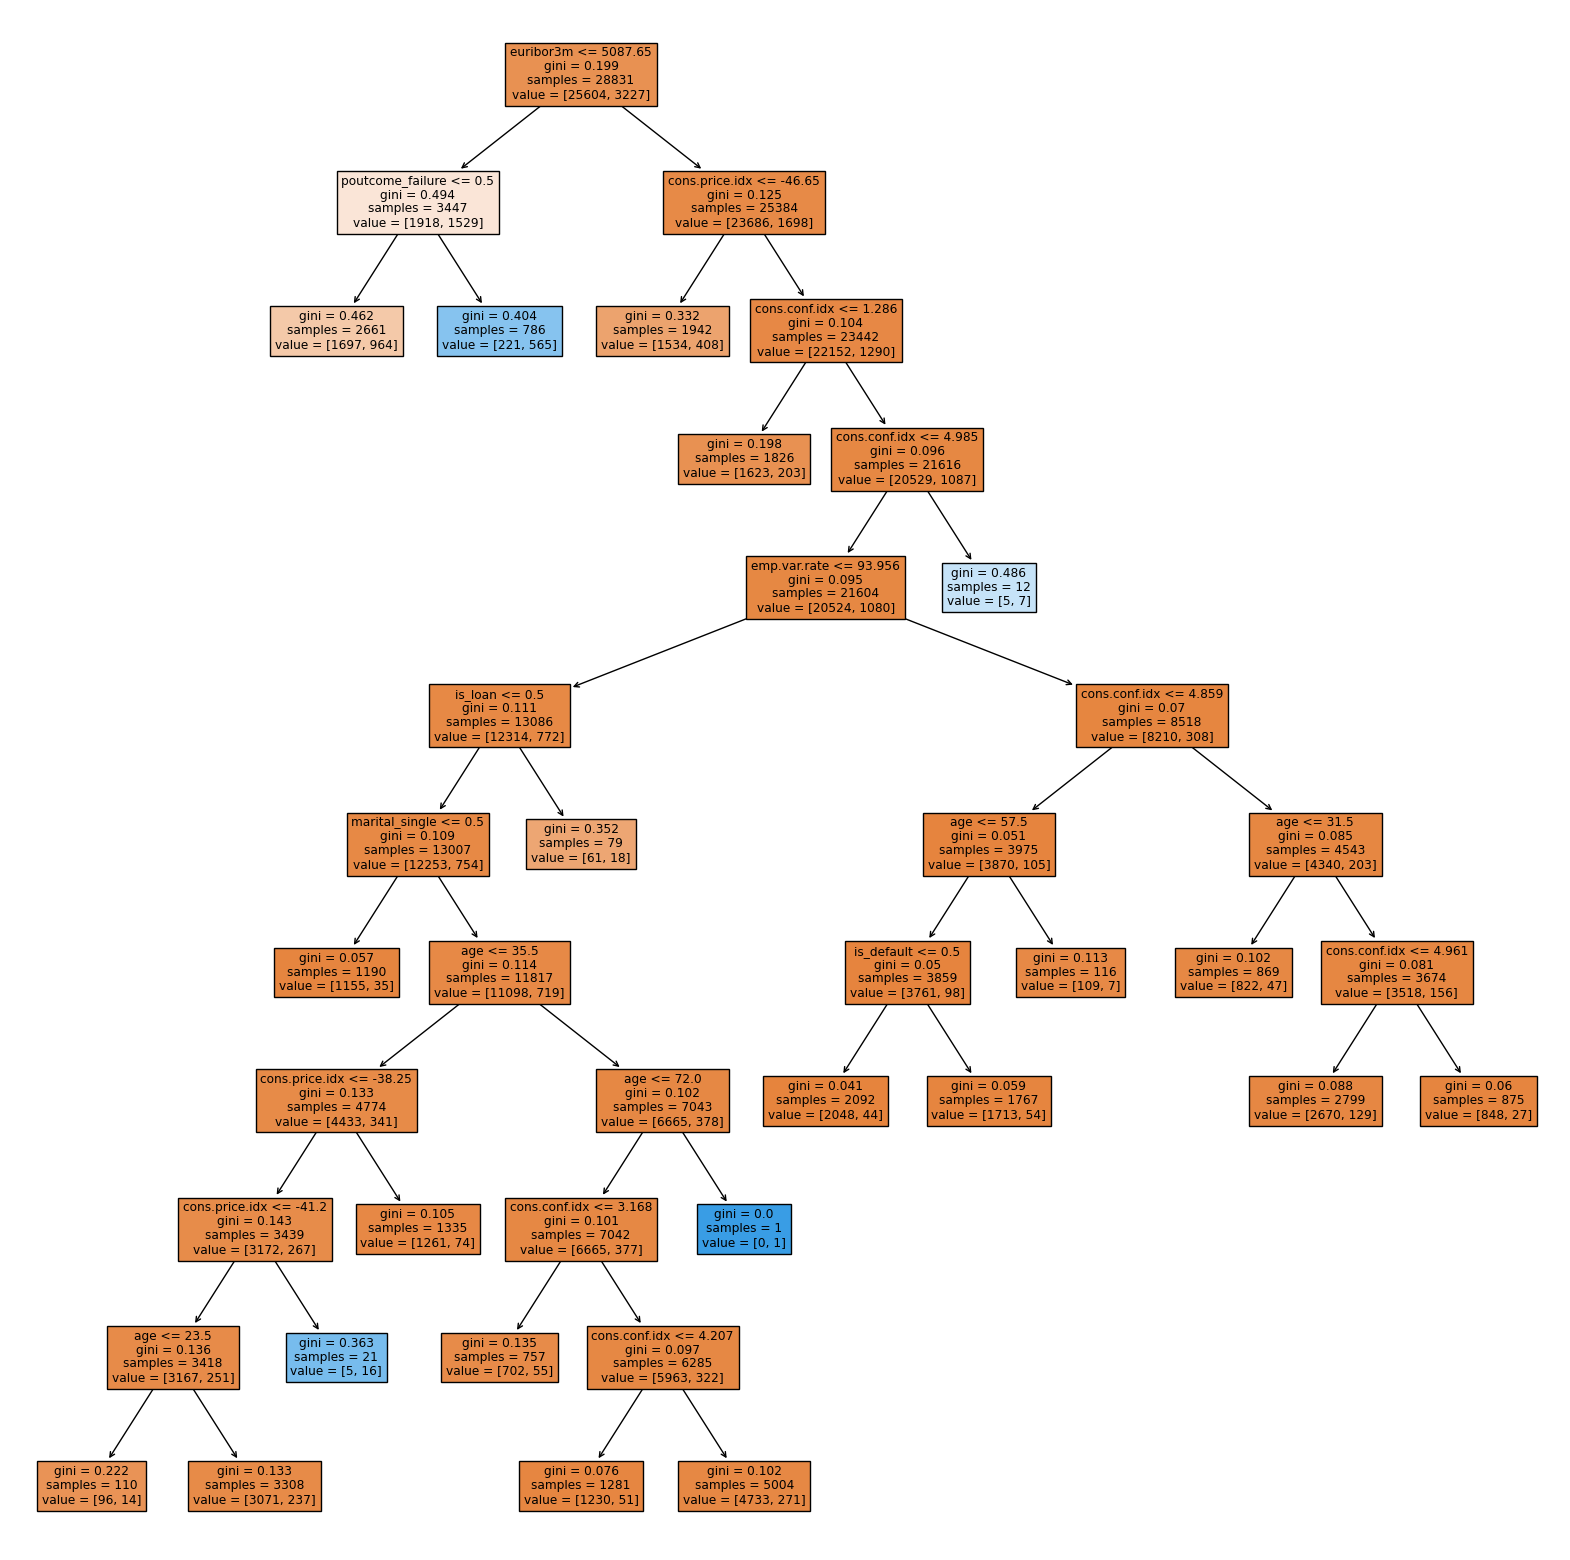

In [973]:
# Importing the sklearn implementation 
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': np.linspace(1, 50, 50, dtype='int16'),
    'min_samples_split': np.linspace(0.1, 1.0, 10),
}

gs = GridSearchCV(
    estimator=DecisionTreeClassifier(criterion='gini', random_state=seed), 
    param_grid=param_grid)

# Fit
gs.fit(X=X_train, y=y_train)

# Predicting the test set
y_pred = gs.predict(X_test)
plt.figure(figsize=(20, 20))
plot_tree(gs.best_estimator_, feature_names=X.columns.tolist(), filled=True)
plt.show()

In [974]:
# Accuracy of the test set
score = gs.score(X=X_test, y=y_test)
print("Accurracy: ", round(score*100,2), "%")

Accurracy:  89.74 %


In [975]:
gs.best_params_

{'max_depth': 11, 'min_samples_split': 0.1}

In [977]:
# Print 4dp of each feature importance 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.feature_importances_
# See the following for an explanation, but note this a regression example so uses MSE rather than GINI
# https://towardsdatascience.com/feature-importance-in-decision-trees-e9450120b445
for i in range(len(gs.best_estimator_.feature_names_in_)):
      if f"{gs.best_estimator_.feature_importances_[i]:.4f}" != "0.0000":
        print(f"{gs.best_estimator_.feature_names_in_[i]}: {gs.best_estimator_.feature_importances_[i]:.4f}")

age: 0.0041
cons.price.idx: 0.0046
cons.conf.idx: 0.0921
euribor3m: 0.0190
nr.employed: 0.7415
is_housing: 0.0001
treated: 0.0039
poutcome_nonexistent: 0.0018
poutcome_success: 0.1328


### 9) Run a LASSO model

In [979]:
#LASSO
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [980]:
# Here we use a scikit-learn pipeline, incorporating a standard scaler, rather than just the Lasso estimator
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('model',Lasso())
])

In [981]:
search = GridSearchCV(pipeline,
    {'model__alpha':np.arange(0.1,10,0.1)},
    cv = 2, scoring="neg_mean_squared_error")

In [982]:
_ = search.fit(X_train,y_train)

In [983]:
search.best_params_

{'model__alpha': 0.1}

In [984]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [985]:
importance = np.abs(coefficients)

In [986]:
importance

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01105695, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [987]:
np.array(X_final.columns)[importance > 0]

array(['nr.employed'], dtype=object)

In [988]:
np.array(X_final.columns)[importance == 0]

array(['age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'is_default', 'is_housing', 'is_loan', 'treated',
       'marital_divorced', 'marital_married', 'marital_single',
       'poutcome_nonexistent', 'poutcome_success',
       'education_high.school', 'education_professional.course',
       'education_university.degree'], dtype=object)